<a href="https://colab.research.google.com/github/bioai96/SKTFLYAI/blob/main/DL/Breast_Cancer_Prediction(kaggle).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install tensorflow


  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4848 sha256=b600c9486a0c1fc91df2495971eb794524a1c3aad30ce380e6f6ad44770a6a22
  Stored in directory: c:\users\009\appdata\local\pip\cache\wheels\b6\0d\90\0d1bbd99855f99cb2f6c2e5ff96f8023fad8ec367695f7d72d
Successfully built termcolor
Note: you may need to restart the kernel to use updated packages.


## 데이터 불러오기

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
df = pd.read_csv('./Breast Cancer.csv')
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


## 데이터 정제하기

In [ ]:
x = df.iloc[:,1:10]
y = df.iloc[:,0]
y.value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [ ]:
y.value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

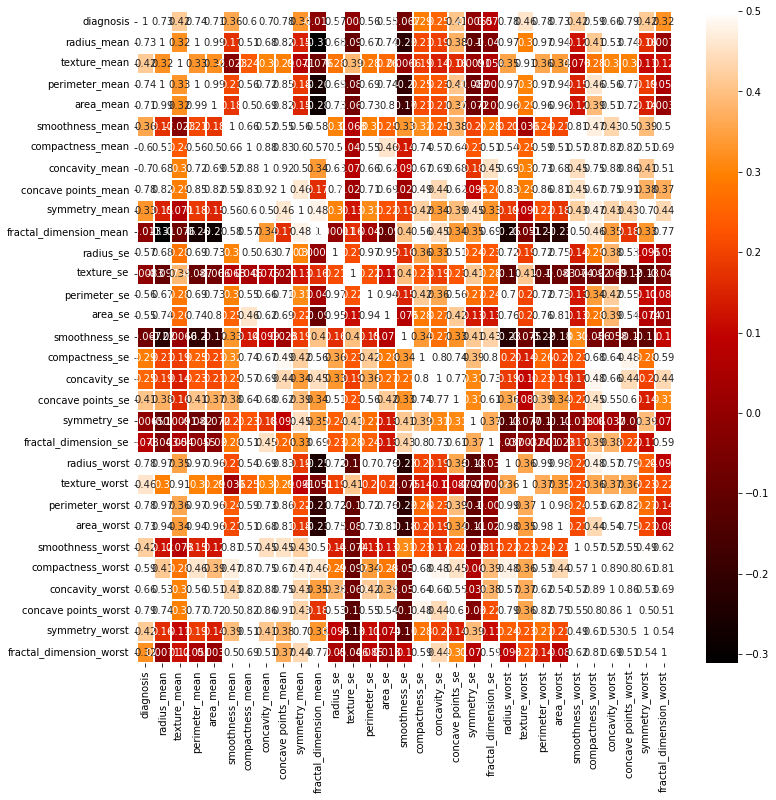

In [ ]:
colormap = plt.cm.gist_heat
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), linewidths = 0.1, vmax=0.5, cmap=colormap,
            linecolor='white', annot = True)
plt.show()

## 모델설계

In [ ]:
#모델 설정
model = Sequential()
model.add(Dense(32,input_dim = 9, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

#모델 컴파일
model.compile(loss ='binary_crossentropy', optimizer = 'adam',
              metrics = ['accuracy'])

#모델 실행
history = model.fit(x,y,epochs = 500 , batch_size=10)

Epoch 1/500
57/57 [==============================] - 1s 1ms/step - loss: 2.4951 - accuracy: 0.5712
Epoch 2/500
57/57 [==============================] - 0s 1ms/step - loss: 0.5059 - accuracy: 0.7715
Epoch 3/500
57/57 [==============================] - 0s 1ms/step - loss: 0.5200 - accuracy: 0.7627
Epoch 4/500
57/57 [==============================] - 0s 1ms/step - loss: 0.4610 - accuracy: 0.8067
Epoch 5/500
57/57 [==============================] - 0s 1ms/step - loss: 0.4204 - accuracy: 0.8084
Epoch 6/500
57/57 [==============================] - 0s 1ms/step - loss: 0.6029 - accuracy: 0.7417
Epoch 7/500
57/57 [==============================] - 0s 1ms/step - loss: 0.4167 - accuracy: 0.8260
Epoch 8/500
57/57 [==============================] - 0s 1ms/step - loss: 0.3815 - accuracy: 0.8489
Epoch 9/500
57/57 [==============================] - 0s 1ms/step - loss: 0.4099 - accuracy: 0.8330
Epoch 10/500
57/57 [==============================] - 0s 1ms/step - loss: 0.3939 - accuracy: 0.8506
Epoch 11/

57/57 [==============================] - 0s 1ms/step - loss: 0.3002 - accuracy: 0.8858
Epoch 84/500
57/57 [==============================] - 0s 1ms/step - loss: 0.3083 - accuracy: 0.8717
Epoch 85/500
57/57 [==============================] - 0s 1ms/step - loss: 0.3024 - accuracy: 0.8928
Epoch 86/500
57/57 [==============================] - 0s 1ms/step - loss: 0.3738 - accuracy: 0.8260
Epoch 87/500
57/57 [==============================] - 0s 1ms/step - loss: 0.2964 - accuracy: 0.8752
Epoch 88/500
57/57 [==============================] - 0s 2ms/step - loss: 0.2884 - accuracy: 0.8840
Epoch 89/500
57/57 [==============================] - 0s 2ms/step - loss: 0.2954 - accuracy: 0.8647
Epoch 90/500
57/57 [==============================] - 0s 2ms/step - loss: 0.2905 - accuracy: 0.8858
Epoch 91/500
57/57 [==============================] - 0s 2ms/step - loss: 0.2876 - accuracy: 0.8735
Epoch 92/500
57/57 [==============================] - 0s 2ms/step - loss: 0.3592 - accuracy: 0.8489
Epoch 93/500


57/57 [==============================] - 0s 2ms/step - loss: 0.2606 - accuracy: 0.8910
Epoch 165/500
57/57 [==============================] - 0s 2ms/step - loss: 0.2528 - accuracy: 0.8928
Epoch 166/500
57/57 [==============================] - 0s 1ms/step - loss: 0.2451 - accuracy: 0.8875
Epoch 167/500
57/57 [==============================] - 0s 1ms/step - loss: 0.2421 - accuracy: 0.9086
Epoch 168/500
57/57 [==============================] - 0s 1ms/step - loss: 0.2402 - accuracy: 0.8963
Epoch 169/500
57/57 [==============================] - 0s 1ms/step - loss: 0.2559 - accuracy: 0.8946
Epoch 170/500
57/57 [==============================] - 0s 1ms/step - loss: 0.2313 - accuracy: 0.9051
Epoch 171/500
57/57 [==============================] - 0s 1ms/step - loss: 0.2471 - accuracy: 0.8893
Epoch 172/500
57/57 [==============================] - 0s 1ms/step - loss: 0.2709 - accuracy: 0.8858
Epoch 173/500
57/57 [==============================] - 0s 1ms/step - loss: 0.2447 - accuracy: 0.8946
Epoc

57/57 [==============================] - 0s 1ms/step - loss: 0.1870 - accuracy: 0.9244
Epoch 246/500
57/57 [==============================] - 0s 1ms/step - loss: 0.1959 - accuracy: 0.9174
Epoch 247/500
57/57 [==============================] - 0s 1ms/step - loss: 0.2224 - accuracy: 0.9069
Epoch 248/500
57/57 [==============================] - 0s 1ms/step - loss: 0.2260 - accuracy: 0.9033
Epoch 249/500
57/57 [==============================] - 0s 1ms/step - loss: 0.2174 - accuracy: 0.9069
Epoch 250/500
57/57 [==============================] - 0s 1ms/step - loss: 0.1960 - accuracy: 0.9174
Epoch 251/500
57/57 [==============================] - 0s 1ms/step - loss: 0.2121 - accuracy: 0.9104
Epoch 252/500
57/57 [==============================] - 0s 1ms/step - loss: 0.2098 - accuracy: 0.9156
Epoch 253/500
57/57 [==============================] - 0s 1ms/step - loss: 0.1966 - accuracy: 0.9156
Epoch 254/500
57/57 [==============================] - 0s 1ms/step - loss: 0.1925 - accuracy: 0.9174
Epoc

57/57 [==============================] - 0s 1ms/step - loss: 0.1898 - accuracy: 0.9297
Epoch 327/500
57/57 [==============================] - 0s 1ms/step - loss: 0.1926 - accuracy: 0.9244
Epoch 328/500
57/57 [==============================] - 0s 1ms/step - loss: 0.1692 - accuracy: 0.9297
Epoch 329/500
57/57 [==============================] - 0s 1ms/step - loss: 0.1760 - accuracy: 0.9192
Epoch 330/500
57/57 [==============================] - 0s 1ms/step - loss: 0.1788 - accuracy: 0.9227
Epoch 331/500
57/57 [==============================] - 0s 1ms/step - loss: 0.1938 - accuracy: 0.9139
Epoch 332/500
57/57 [==============================] - 0s 1ms/step - loss: 0.1662 - accuracy: 0.9332
Epoch 333/500
57/57 [==============================] - 0s 1ms/step - loss: 0.1791 - accuracy: 0.9174
Epoch 334/500
57/57 [==============================] - 0s 1ms/step - loss: 0.1710 - accuracy: 0.9262
Epoch 335/500
57/57 [==============================] - 0s 1ms/step - loss: 0.2231 - accuracy: 0.9086
Epoc

57/57 [==============================] - 0s 1ms/step - loss: 0.1657 - accuracy: 0.9315
Epoch 408/500
57/57 [==============================] - 0s 1ms/step - loss: 0.1623 - accuracy: 0.9244
Epoch 409/500
57/57 [==============================] - 0s 1ms/step - loss: 0.1766 - accuracy: 0.9297
Epoch 410/500
57/57 [==============================] - 0s 1ms/step - loss: 0.2038 - accuracy: 0.9104
Epoch 411/500
57/57 [==============================] - 0s 1ms/step - loss: 0.1636 - accuracy: 0.9262
Epoch 412/500
57/57 [==============================] - 0s 1ms/step - loss: 0.2009 - accuracy: 0.9297
Epoch 413/500
57/57 [==============================] - 0s 2ms/step - loss: 0.1711 - accuracy: 0.9244
Epoch 414/500
57/57 [==============================] - 0s 1ms/step - loss: 0.1583 - accuracy: 0.9315
Epoch 415/500
57/57 [==============================] - 0s 1ms/step - loss: 0.1796 - accuracy: 0.9297
Epoch 416/500
57/57 [==============================] - 0s 1ms/step - loss: 0.1680 - accuracy: 0.9244
Epoc

57/57 [==============================] - 0s 1ms/step - loss: 0.1563 - accuracy: 0.9402
Epoch 489/500
57/57 [==============================] - 0s 1ms/step - loss: 0.1615 - accuracy: 0.9297
Epoch 490/500
57/57 [==============================] - 0s 1ms/step - loss: 0.1602 - accuracy: 0.9262
Epoch 491/500
57/57 [==============================] - 0s 1ms/step - loss: 0.1609 - accuracy: 0.9332
Epoch 492/500
57/57 [==============================] - 0s 1ms/step - loss: 0.1441 - accuracy: 0.9455
Epoch 493/500
57/57 [==============================] - 0s 1ms/step - loss: 0.1536 - accuracy: 0.9350
Epoch 494/500
57/57 [==============================] - 0s 1ms/step - loss: 0.1647 - accuracy: 0.9350
Epoch 495/500
57/57 [==============================] - 0s 1ms/step - loss: 0.1569 - accuracy: 0.9315
Epoch 496/500
57/57 [==============================] - 0s 1ms/step - loss: 0.1664 - accuracy: 0.9350
Epoch 497/500
57/57 [==============================] - 0s 1ms/step - loss: 0.1502 - accuracy: 0.9297
Epoc

In [ ]:
score = model.evaluate(x_test, y_test)
print('Test Accuracy :', score[1])

6/6 [==============================] - 0s 1ms/step - loss: 0.1755 - accuracy: 0.9298
Test Accuracy : 0.9298245906829834
